In [1]:
%matplotlib inline
import numpy as np
import phconvert as phc
print('phconvert version: ' + phc.__version__)
f="/dataB/smfretData/lineardiub/LS9_150pM_poslineardiUb25c101c_alex488cy5_32MHz_ 1.ptu"
d=phc.pqreader.load_ptu(f)

phconvert version: 0.8.2


In [2]:
print(len(d[0]))

46450410


In [3]:
print(len(d[1]))

46450410


In [4]:
print(len(d[2]))

46450410


In [5]:
print(len(d[3]))

4


In [6]:
import json
#parsed = json.loads(d[3])
print(json.dumps(d[3],indent=4))

{
    "timestamps_unit": 6.249687515624219e-08,
    "nanotimes_unit": 2.50000003337858e-11,
    "tags": {
        "File_GUID": {
            "type": "tyAnsiString",
            "data": "{A8D0113D-387A-4033-9A81-E520AA07E8E0}",
            "idx": -1,
            "value": 40
        },
        "File_CreatingTime": {
            "type": "tyTDateTime",
            "idx": -1,
            "value": "2017-08-03 11:17:21"
        },
        "$StartedByRemoteInterface": {
            "type": "tyBool8",
            "idx": -1,
            "value": true
        },
        "Measurement_SubMode": {
            "type": "tyInt8",
            "idx": -1,
            "value": 1
        },
        "File_Comment": {
            "type": "tyAnsiString",
            "data": "{First Dichroic Mirror}: 405/488/561/640\r\n{Pinhole Size(um)}: 99.6\r\n{Scan Direction}: One way\r\n{Scanner Zoom}: 1.000\r\n{Scan Speed}: 2\r\n{Optics}: Plan Apo IR 60x WI DIC N2",
            "idx": -1,
            "value": 176
        

In [7]:
print(int(d[3]["tags"]["TTResult_SyncRate"]['value']))
print(d[3]["timestamps_unit"]+1)

16000800
1.0000000624968752


(array([  1.97617750e+07,   1.43830000e+04,   1.43590000e+04,
          1.78060000e+04,   1.79110000e+04,   1.89520000e+04,
          2.68290000e+04,   2.56750000e+04,   2.03780000e+04,
          2.11590000e+04,   2.13190000e+04,   1.98038600e+06,
          4.75730600e+06,   3.31910300e+06,   2.21551600e+06,
          1.62786100e+06,   1.18755000e+06,   9.62457000e+05,
          7.58422000e+05,   6.10099000e+05,   4.75788000e+05,
          4.10461000e+05,   3.40979000e+05,   2.87334000e+05,
          2.34033000e+05,   2.08129000e+05,   1.78723000e+05,
          1.54333000e+05,   1.29555000e+05,   1.17922000e+05,
          1.04402000e+05,   9.18230000e+04,   7.84190000e+04,
          7.32500000e+04,   6.53710000e+04,   5.87640000e+04,
          5.13120000e+04,   4.90410000e+04,   4.46420000e+04,
          4.11770000e+04,   3.68290000e+04,   3.54430000e+04,
          3.33680000e+04,   3.10770000e+04,   2.82100000e+04,
          2.79760000e+04,   2.63450000e+04,   2.51700000e+04,
        

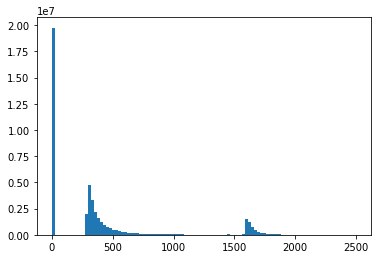

In [8]:
import matplotlib
matplotlib.pyplot.hist(d[2],101)

In [9]:
print(max(d[2]))

2500


In [10]:
for det, count in zip(*np.unique(d[1], return_counts=True)):
    print("%8d   %8d" % (det, count))

       0   11783785
       1   14918971
     127   19747654


In [11]:
nanotimes = d[2]
detectors = d[1]
timestamps = d[0]

not_overflow = d[2] != 0

detectors = detectors[not_overflow]
timestamps = timestamps[not_overflow]
nanotimes = nanotimes[not_overflow]
print("Detector    Counts")
print("--------   --------")
for det, count in zip(*np.unique(detectors, return_counts=True)):
    print("%8d   %8d" % (det, count))


Detector    Counts
--------   --------
       0   11783630
       1   14918897


In [12]:
measurement_specs = dict(
    measurement_type = 'smFRET-nsALEX',
    laser_repetition_rate=int(d[3]["tags"]["TTResult_SyncRate"]['value']),
    detectors_specs = {'spectral_ch1': [1],  # list of donor's detector IDs
                       'spectral_ch2': [0]},  # list of acceptor's detector IDs
    alex_excitation_period1=[10,1240],
    alex_excitation_period2=[1260,2490]
    )
tcspc_num_bins=max(d[2])
nanotimes_specs=dict(
    tcspc_unit=float(d[3]["tags"]["MeasDesc_Resolution"]['value']),
    tcspc_num_bins=tcspc_num_bins,
    tcspc_range=float(d[3]["tags"]["MeasDesc_Resolution"]['value'])*tcspc_num_bins
)
photon_data = dict(
    timestamps=timestamps,
    detectors=detectors,
    timestamps_specs={'timestamps_unit': d[3]["timestamps_unit"]},
    measurement_specs=measurement_specs,
    nanotimes_specs=nanotimes_specs,
    nanotimes=nanotimes
)
setup = dict(
    ## Mandatory fields
    num_pixels = 2,                   # using 2 detectors
    num_spots = 1,                    # a single confoca excitation
    num_spectral_ch = 2,              # donor and acceptor detection 
    num_polarization_ch = 1,          # no polarization selection 
    num_split_ch = 1,                 # no beam splitter
    excitation_cw=[False,False],
    modulated_excitation = True,     # CW excitation, no modulation 
    excitation_alternated = [True,True],  # CW excitation, no modulation 
    lifetime = True                 #  TCSPC in detection
)

description = 'This is a fake dataset which mimics smFRET data.'

author = 'kk'
author_affiliation = 'Name of Research Institution'
identity = dict(
    author=author,
    author_affiliation=author_affiliation)
data = dict(
    description=description,
    photon_data = photon_data,
    setup=setup,
    identity=identity,
)
phc.hdf5.save_photon_hdf5(data, h5_fname='LS3.h5', overwrite=True)

Saving: LS3.h5
Photon-HDF5 WARNING: Missing field "excitation_wavelengths" in "/setup". 
Photon-HDF5 WARNING: Missing field "detection_wavelengths" in "/setup". 


In [13]:
timestamps

array([       2003,        4465,        6527, ..., 57603719474,
       57603721109, 57603723482])

In [14]:
float(d[3]["tags"]["MeasDesc_Resolution"]['value'])

2.50000003337858e-11